In [26]:
"""
Simple linear regression example in TensorFlow
This program tries to predict the number of thefts from 
the number of fire in the city of Chicago
"""

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

DATA_FILE = 'data/fire_theft.xls'


In [27]:
# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
print(sheet)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1
print(data[:5])
print(n_samples)
# import pandas as pd
# data_pd = pd.read_excel(DATA_FILE)
# data_pd.T

[[  6.2  29. ]
 [  9.5  44. ]
 [ 10.5  36. ]
 [  7.7  37. ]
 [  8.6  53. ]]
42


In [28]:
# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

In [21]:
# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

In [22]:
# Step 4: build model to predict Y
Y_predicted = X * w + b 


In [23]:
# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')

Epoch 0: 2069.6319333978354
Epoch 1: 2117.0123581953535
Epoch 2: 2092.302723001866
Epoch 3: 2068.5080461938464
Epoch 4: 2045.591184088162
Epoch 5: 2023.5146448101316
Epoch 6: 2002.2447619835536
Epoch 7: 1981.748338803649
Epoch 8: 1961.9944411260742
Epoch 9: 1942.9520116143283
Epoch 10: 1924.5930823644712
Epoch 11: 1906.8898800636332
Epoch 12: 1889.8164505837929
Epoch 13: 1873.347133841543
Epoch 14: 1857.4588400604468
Epoch 15: 1842.1278742424079
Epoch 16: 1827.332495119955
Epoch 17: 1813.0520579712022
Epoch 18: 1799.2660847636982
Epoch 19: 1785.9562132299961
Epoch 20: 1773.1024853109072
Epoch 21: 1760.689129482884
Epoch 22: 1748.6984157081515
Epoch 23: 1737.1138680398553
Epoch 24: 1725.920873066732
Epoch 25: 1715.1046249579008
Epoch 26: 1704.6500954309377
Epoch 27: 1694.5447134910141
Epoch 28: 1684.7746311347667
Epoch 29: 1675.328450968245
Epoch 30: 1666.1935385839038
Epoch 31: 1657.3584002084322
Epoch 32: 1648.8122658529207
Epoch 33: 1640.5440742547091
Epoch 34: 1632.5446836102221
Epo

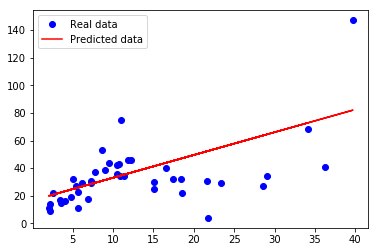

In [24]:
# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

with tf.Session() as sess:
	# Step 7: initialize the necessary variables, in this case, w and b
	sess.run(tf.global_variables_initializer()) 
	
	writer = tf.summary.FileWriter('./my_graph/01/linear_reg', sess.graph)
	
	# Step 8: train the model
	for i in range(150): # train the model 100 times
		total_loss = 0
		for x, y in data:
			# Session runs train_op and fetch values of loss
			_, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
			total_loss += l
		print ('Epoch {0}: {1}'.format(i, total_loss/n_samples))

	# close the writer when you're done using it
	print(writer)
	writer.close() 
	
	# Step 9: output the values of w and b
	w_value, b_value = sess.run([w, b]) 

# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w_value + b_value, 'r', label='Predicted data')
plt.legend()
plt.show()

Epoch 0: nan
Epoch 1: nan
Epoch 2: nan
Epoch 3: nan
Epoch 4: nan
Epoch 5: nan
Epoch 6: nan
Epoch 7: nan
Epoch 8: nan
Epoch 9: nan
Epoch 10: nan
Epoch 11: nan
Epoch 12: nan
Epoch 13: nan
Epoch 14: nan
Epoch 15: nan
Epoch 16: nan
Epoch 17: nan
Epoch 18: nan
Epoch 19: nan
Epoch 20: nan
Epoch 21: nan
Epoch 22: nan
Epoch 23: nan
Epoch 24: nan
Epoch 25: nan
Epoch 26: nan
Epoch 27: nan
Epoch 28: nan
Epoch 29: nan
Epoch 30: nan
Epoch 31: nan
Epoch 32: nan
Epoch 33: nan
Epoch 34: nan
Epoch 35: nan
Epoch 36: nan
Epoch 37: nan
Epoch 38: nan
Epoch 39: nan
Epoch 40: nan
Epoch 41: nan
Epoch 42: nan
Epoch 43: nan
Epoch 44: nan
Epoch 45: nan
Epoch 46: nan
Epoch 47: nan
Epoch 48: nan
Epoch 49: nan
Epoch 50: nan
Epoch 51: nan
Epoch 52: nan
Epoch 53: nan
Epoch 54: nan
Epoch 55: nan
Epoch 56: nan
Epoch 57: nan
Epoch 58: nan
Epoch 59: nan
Epoch 60: nan
Epoch 61: nan
Epoch 62: nan
Epoch 63: nan
Epoch 64: nan
Epoch 65: nan
Epoch 66: nan
Epoch 67: nan
Epoch 68: nan
Epoch 69: nan
Epoch 70: nan
Epoch 71: nan
Ep

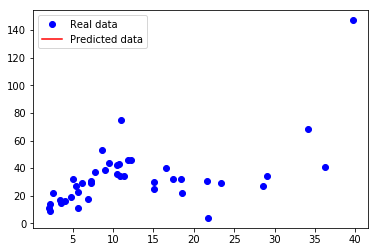

In [29]:
w = tf.Variable(0.0, name='weights')
u = tf.Variable(0.0, name='weight_2')
b = tf.Variable(0.0, name='bias')
# Step 4: build model to predict Y
Y_predicted = w*X*X + u*X + b 
loss = tf.square(Y - Y_predicted, name='loss')
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

with tf.Session() as sess:
	# Step 7: initialize the necessary variables, in this case, w and b
	sess.run(tf.global_variables_initializer()) 
	
# 	writer = tf.summary.FileWriter('./my_graph/01/linear_reg', sess.graph)
	
	# Step 8: train the model
	for i in range(150): # train the model 100 times
		total_loss = 0
		for x, y in data:
			# Session runs train_op and fetch values of loss
			_, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
			total_loss += l
		print ('Epoch {0}: {1}'.format(i, total_loss/n_samples))

	# close the writer when you're done using it
	print(writer)
	writer.close() 
	
	# Step 9: output the values of w and b
	w_value, u_value, b_value = sess.run([w,u,b]) 

# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X*X*w_value +X * u_value + b_value, 'r', label='Predicted data')
plt.legend()
plt.show()

In [8]:
def huber_loss(labels, predictions, delta=1.0):
    residual = tf.abs(predictions - labels)
    condition = tf.less(residual, delta)
    small_res = 0.5 * tf.square(residual)
    large_res = delta * residual - 0.5 * tf.square(delta)
    return tf.where(condition, small_res, large_res)

In [75]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
w = tf.Variable(0.0)
b = tf.Variable(0.0)
Y_pred = X * w + b
loss = tf.square(Y_pred - Y)
loss_hb = huber_loss(Y, Y_pred)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)
optimizer_hb = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss_hb)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(100):
        total_loss = 0
        for x, y in data:
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y: y})
            total_loss += l
        print('#Epoch {0}: loss = {1}'.format(i, total_loss/n_samples) )
    w_result, b_result = sess.run([w, b])

with tf.Session() as sess2:
    sess2.run(tf.global_variables_initializer())
    for i in range(100):
        total_loss = 0
        for x, y in data:
            _, l = sess2.run([optimizer_hb, loss_hb], feed_dict={X: x, Y: y})
            total_loss += l
        print('#Epoch {0}: huber_loss = {1}'.format(i, total_loss/n_samples) )
    w_result_hb, b_result_hb = sess2.run([w, b])

#Epoch 0: loss = 2069.6319333978354
#Epoch 1: loss = 2117.0123581953535
#Epoch 2: loss = 2092.302723001866
#Epoch 3: loss = 2068.5080461938464
#Epoch 4: loss = 2045.591184088162
#Epoch 5: loss = 2023.5146448101316
#Epoch 6: loss = 2002.2447619835536
#Epoch 7: loss = 1981.748338803649
#Epoch 8: loss = 1961.9944411260742
#Epoch 9: loss = 1942.9520116143283
#Epoch 10: loss = 1924.5930823644712
#Epoch 11: loss = 1906.8898800636332
#Epoch 12: loss = 1889.8164505837929
#Epoch 13: loss = 1873.347133841543
#Epoch 14: loss = 1857.4588400604468
#Epoch 15: loss = 1842.1278742424079
#Epoch 16: loss = 1827.332495119955
#Epoch 17: loss = 1813.0520579712022
#Epoch 18: loss = 1799.2660847636982
#Epoch 19: loss = 1785.9562132299961
#Epoch 20: loss = 1773.1024853109072
#Epoch 21: loss = 1760.689129482884
#Epoch 22: loss = 1748.6984157081515
#Epoch 23: loss = 1737.1138680398553
#Epoch 24: loss = 1725.920873066732
#Epoch 25: loss = 1715.1046249579008
#Epoch 26: loss = 1704.6500954309377
#Epoch 27: loss = 

In [79]:
data_x, data_y = data.T[0], data.T[1]
plt.plot(data_x, data_y, '.', label='real data')
plt.xlabel('X, number of fire')
plt.ylabel('Y, number of theft')

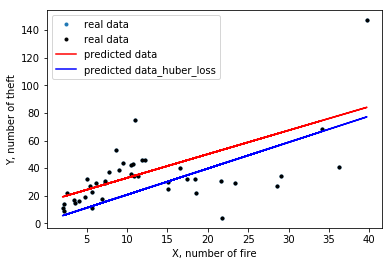

In [80]:
plt.plot(data_x, data_y, 'k.', label='real data')
plt.plot(data_x, (data_x * w_result + b_result), 'r', label='predicted data')
plt.plot(data_x, (data_x * w_result_hb + b_result_hb), 'b', label='predicted data_huber_loss')
plt.xlabel('X, number of fire')
plt.ylabel('Y, number of theft')
plt.legend()
plt.show()

